# Script to make a collage from images

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
results_dir = 'results'

os.listdir(results_dir)

['210720photo_eglise_crop_0_0.png',
 '210720photo_eglise_crop_2_0.png',
 'N_Tees_Image_crop_0_1_halftoned.png',
 '210720photo_eglise_crop_1_0.png',
 'N_Tees_Image_crop_0_2_halftoned.png',
 '210720photo_eglise_crop_2_0_halftoned.png',
 'N_Tees_Image_crop_0_3_halftoned.png',
 '210720photo_eglise_crop_0_0_halftoned.png',
 'N_Tees_Image_crop_0_0_halftoned.png',
 'N_Tees_Image_crop_0_3.png',
 'N_Tees_Image_crop_0_2.png',
 'N_Tees_Image_crop_0_0.png',
 '210720photo_eglise_crop_1_0_halftoned.png',
 'N_Tees_Image_crop_0_1.png']

In [3]:
filenames = [
    '210720photo_eglise_crop_0_0_halftoned.png',
    '210720photo_eglise_crop_1_0_halftoned.png',
    '210720photo_eglise_crop_2_0_halftoned.png'
]

source_images = [
    Image.open(os.path.join(results_dir, f)) 
    for f in filenames
]
len(source_images)

3

***Images must all have the same dimensions!***

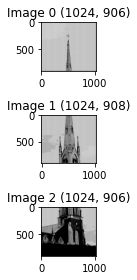

In [4]:
fig, axes = plt.subplots(len(source_images), 1)

for i, (im, ax) in enumerate(zip(source_images, axes)):
    ax.imshow(im)
    ax.set_title(f"Image {i} {im.size}")
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    #for side in ['top', 'bottom', 'left', 'right']:
    #    ax.spines[side].set_visible(False)

plt.tight_layout()
plt.show()

In [5]:
border_size = 40
border_color = (255, 255, 255, 255)

# Choose layout for collage
layout = np.array([[0], [1], [2]])

layout

array([[0],
       [1],
       [2]])

In [6]:
h_elements = [border_size]
for i in layout[0]:
    h_elements = h_elements + [source_images[i].size[0], border_size]
v_elements = [border_size]
for j in layout[:,0]:
    v_elements = v_elements + [source_images[j].size[1], border_size]
h_elements, v_elements

([40, 1024, 40], [40, 906, 40, 908, 40, 906, 40])

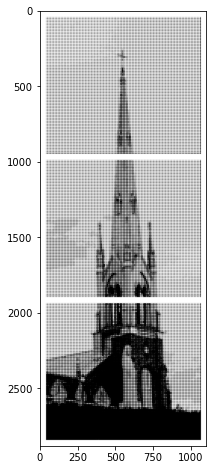

In [7]:
width = sum(h_elements)
height = sum(v_elements)

mode = source_images[0].mode
collage = Image.new(mode, (width, height), color=border_color)

y = border_size
for j in range(layout.shape[1]):
    x = border_size
    for i in range(layout.shape[0]):
        im = source_images[layout[i, j]]
        collage.paste(im, (y, x))
        x += im.size[1] + border_size
    y += im.size[0] + border_size

collage.save(os.path.join(results_dir, 'eglise_collage.jpg'))

fig, ax = plt.subplots(figsize=(3,8))
plt.imshow(collage)
plt.show()